In [1]:
import pandas as pd

In [2]:
data_info = pd.read_csv('lending_club_info.csv',index_col='LoanStatNew')

In [3]:
data_info.head()

,Description
LoanStatNew,
loan_amnt,The listed amount of the loan applied for by t...
term,The number of payments on the loan. Values are...
int_rate,Interest Rate on the loan
installment,The monthly payment owed by the borrower if th...
grade,LC assigned loan grade


In [4]:
data_info.loc['revol_util']

Description    Revolving line utilization rate, or the amount...
Name: revol_util, dtype: object

In [5]:
data_info.loc['revol_util']['Description']

'Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.'

In [6]:
#create a function that easily gets the desciption 
def feat_info(col_name):
    print(data_info.loc[col_name]['Description'])

In [7]:
#call function
feat_info('mort_acc')

Number of mortgage accounts.


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# might be needed depending on your version of Jupyter
%matplotlib inline

In [9]:
df = pd.read_csv('lending_club_loan_two.csv')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
loan_amnt               396030 non-null float64
term                    396030 non-null object
int_rate                396030 non-null float64
installment             396030 non-null float64
grade                   396030 non-null object
sub_grade               396030 non-null object
emp_title               373103 non-null object
emp_length              377729 non-null object
home_ownership          396030 non-null object
annual_inc              396030 non-null float64
verification_status     396030 non-null object
issue_d                 396030 non-null object
loan_status             396030 non-null object
purpose                 396030 non-null object
title                   394275 non-null object
dti                     396030 non-null float64
earliest_cr_line        396030 non-null object
open_acc                396030 non-null float64
pub_rec                 396030 non-nu

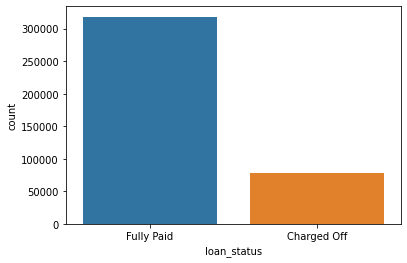

In [11]:
sns.countplot(df['loan_status'])

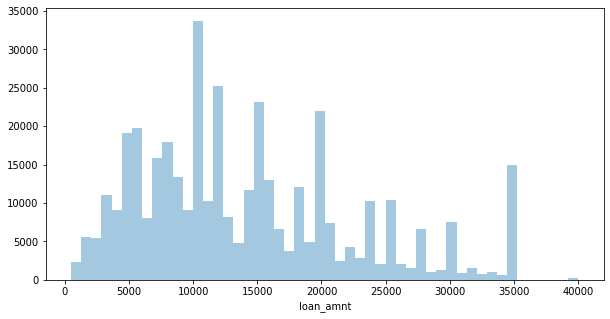

In [12]:
plt.figure(figsize=(10,5))
sns.distplot(df['loan_amnt'], kde = False)

In [13]:
df.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


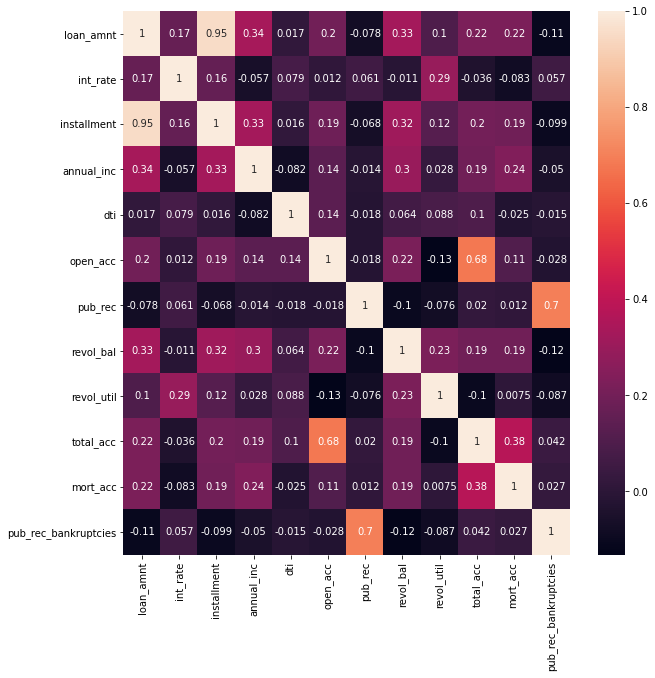

In [14]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True )

In [15]:
feat_info('installment')

The monthly payment owed by the borrower if the loan originates.


In [16]:
feat_info('loan_amnt')

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


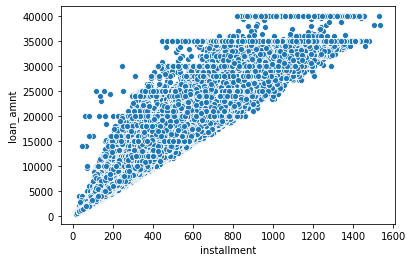

In [17]:
sns.scatterplot(x ='installment', y= 'loan_amnt', data =df)

In [18]:
#sns.boxplot(x ='loan_status', y= 'loan_amnt', data =df)

In [19]:
df['loan_amnt'].describe().transpose()

count    396030.000000
mean      14113.888089
std        8357.441341
min         500.000000
25%        8000.000000
50%       12000.000000
75%       20000.000000
max       40000.000000
Name: loan_amnt, dtype: float64

In [20]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


In [21]:
df['grade'].unique()

array(['B', 'A', 'C', 'E', 'D', 'F', 'G'], dtype=object)

In [22]:
df['sub_grade'].unique()

array(['B4', 'B5', 'B3', 'A2', 'C5', 'C3', 'A1', 'B2', 'C1', 'A5', 'E4',
       'A4', 'A3', 'D1', 'C2', 'B1', 'D3', 'D5', 'D2', 'E1', 'E2', 'E5',
       'F4', 'E3', 'D4', 'G1', 'F5', 'G2', 'C4', 'F1', 'F3', 'G5', 'G4',
       'F2', 'G3'], dtype=object)

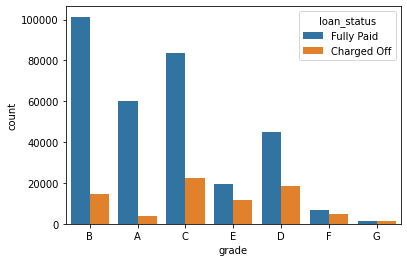

In [23]:
sns.countplot(df['grade'], hue =df['loan_status'])

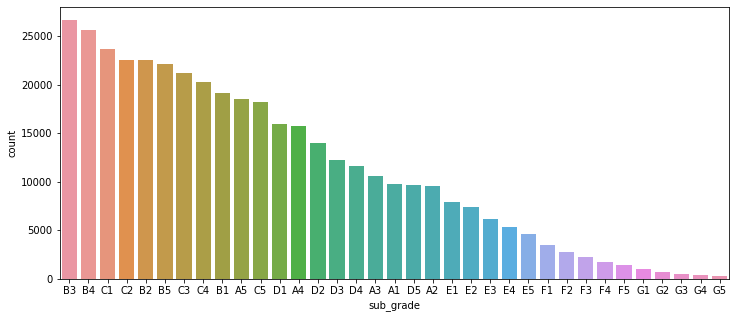

In [24]:
plt.figure(figsize =(12,5))
sns.countplot(df['sub_grade'], order = df['sub_grade'].value_counts().index)

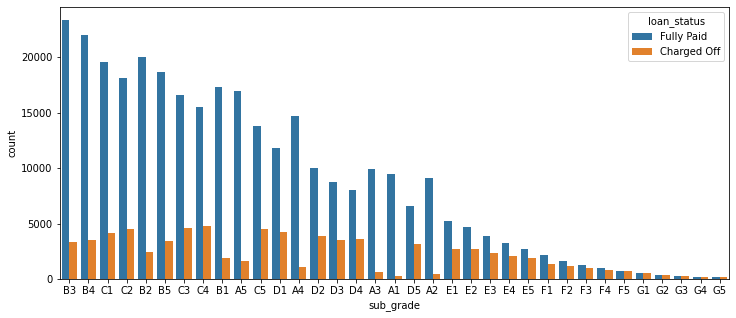

In [25]:
plt.figure(figsize =(12,5))
sns.countplot(df['sub_grade'], order = df['sub_grade'].value_counts().index, hue=df['loan_status'])

In [26]:
df['loan_repaid'] = df["loan_status"].map({'Fully Paid': 1, 'Charged Off':0})

In [27]:
df['loan_repaid'] 

0         1
1         1
2         1
3         1
4         0
         ..
396025    1
396026    1
396027    1
396028    1
396029    1
Name: loan_repaid, Length: 396030, dtype: int64

In [28]:
df.drop('loan_status', axis=1, inplace= True)

In [29]:
df['loan_repaid'] 

0         1
1         1
2         1
3         1
4         0
         ..
396025    1
396026    1
396027    1
396028    1
396029    1
Name: loan_repaid, Length: 396030, dtype: int64

In [30]:
df.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,loan_repaid
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539,-0.059836
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450,-0.247758
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628,-0.041082
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162,0.053432
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558,-0.062413
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732,-0.028012
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408,-0.019933
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532,0.010892
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751,-0.082373
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035,0.017893


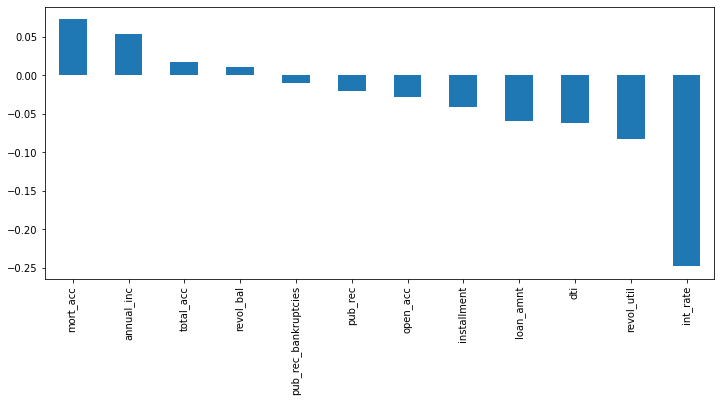

In [31]:
plt.figure(figsize=(12,5))
df.corr()['loan_repaid'][:-1].sort_values(ascending= False).plot.bar()

In [32]:
len(df)

396030

In [33]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [34]:
perc = print(df.isnull().sum()/len(df))

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               0.057892
emp_length              0.046211
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
purpose                 0.000000
title                   0.004431
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.000697
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                0.095435
pub_rec_bankruptcies    0.001351
address                 0.000000
loan_repaid             0.000000
dtype: float64


In [35]:
print(feat_info("emp_title"))
print(feat_info("emp_length"))

The job title supplied by the Borrower when applying for the loan.*
None
Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 
None


In [36]:
df["emp_title"].nunique()

173105

In [37]:
df["emp_title"].value_counts()

Teacher                              4389
Manager                              4250
Registered Nurse                     1856
RN                                   1846
Supervisor                           1830
                                     ... 
asst guest service manager              1
Bus Installers Advertising              1
Computer Services Incorporated          1
Phoenixville Area School District       1
Hawkeye                                 1
Name: emp_title, Length: 173105, dtype: int64

In [38]:
df.drop('emp_title', axis =1, inplace = True)

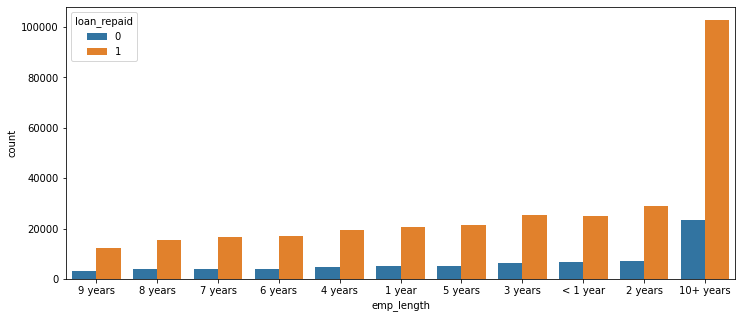

In [39]:
plt.figure(figsize =(12,5))
sns.countplot(df['emp_length'], order = df['emp_length'].value_counts().sort_values().index,  hue=df['loan_repaid'])

In [40]:
df['emp_length'].value_counts()

10+ years    126041
2 years       35827
< 1 year      31725
3 years       31665
5 years       26495
1 year        25882
4 years       23952
6 years       20841
7 years       20819
8 years       19168
9 years       15314
Name: emp_length, dtype: int64

In [41]:
df.drop('emp_length', axis =1, inplace = True)

In [42]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [43]:
df['purpose'].head(10)

0              vacation
1    debt_consolidation
2           credit_card
3           credit_card
4           credit_card
5    debt_consolidation
6      home_improvement
7           credit_card
8    debt_consolidation
9    debt_consolidation
Name: purpose, dtype: object

In [44]:
df['title'].head(10)

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
5         Debt consolidation
6           Home improvement
7       No More Credit Cards
8         Debt consolidation
9         Debt Consolidation
Name: title, dtype: object

In [45]:
feat_info('mort_acc')

Number of mortgage accounts.


In [46]:
df['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
23.0         2
32.0         2
26.0         2
31.0         2
30.0         1
28.0         1
34.0         1
Name: mort_acc, dtype: int64

In [47]:
df.corr()['mort_acc'].sort_values()

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

In [48]:
fill =df.groupby('total_acc').mean()['mort_acc']


In [49]:
df['mort_acc'] = df.apply(lambda x: fill[x['total_acc']] if (np.isnan(x['mort_acc'])) else x['mort_acc'], axis=1)

In [50]:
df.isnull().sum()

loan_amnt                  0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
purpose                    0
title                   1755
dti                        0
earliest_cr_line           0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util               276
total_acc                  0
initial_list_status        0
application_type           0
mort_acc                   0
pub_rec_bankruptcies     535
address                    0
loan_repaid                0
dtype: int64

In [51]:
df.dropna(inplace = True)

In [52]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
purpose                 0
title                   0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

In [53]:
df.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'purpose', 'title', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

In [54]:
df['term'] = df['term'].apply(lambda term:int(term[:3]))

In [55]:
df.drop('grade', axis=1, inplace=True)

In [56]:
dumm = pd.get_dummies(df['sub_grade'], drop_first=True)

In [57]:
df = pd.concat([df.drop('sub_grade', axis=1), dumm], axis=1)

In [58]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address', 'loan_repaid', 'A2',
       'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4',
       'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1',
       'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5'],
      dtype='object')

In [59]:
dumm2 = pd.get_dummies(df[['verification_status', 'application_type', 'initial_list_status', 'purpose']], drop_first = True)

In [60]:
 df.drop(['verification_status', 'application_type', 'initial_list_status', 'purpose'], axis=1, inplace = True)

In [61]:
df = pd.concat([df, dumm2], axis=1)

In [62]:
df['home_ownership'].value_counts()

MORTGAGE    197110
RENT        158770
OWN          37443
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

In [63]:
df['home_ownership'] = df['home_ownership'].replace(['NONE', "ANY"], 'OTHER')

dumm3 = pd.get_dummies(df['home_ownership'], drop_first= True)


In [64]:
df.drop('home_ownership', axis=1, inplace=True)

In [65]:
df = pd.concat([df, dumm3], axis=1)

In [66]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'issue_d',
       'title', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'mort_acc', 'pub_rec_bankruptcies',
       'address', 'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3',
       'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5',
       'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2',
       'G3', 'G4', 'G5', 'verification_status_Source Verified',
       'verification_status_Verified', 'application_type_INDIVIDUAL',
       'application_type_JOINT', 'initial_list_status_w',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'OTHER', 'OWN', '

In [67]:
df['zip_code'] = df['address'].apply(lambda x: x.split(' ')[-1])

In [68]:
df['zip_code'].value_counts()

70466    56629
22690    56157
30723    56129
48052    55560
00813    45512
29597    45200
05113    45120
11650    11149
93700    11088
86630    10921
Name: zip_code, dtype: int64

In [69]:
dumm4 = pd.get_dummies(df['zip_code'], drop_first= True)
df['zip_code'] = df['address'].apply(lambda x:x.split(' ')[-1])

df = pd.concat([df, dumm3], axis=1)

In [70]:
df.drop('issue_d', axis=1)

,loan_amnt,term,int_rate,installment,annual_inc,title,dti,earliest_cr_line,open_acc,pub_rec,...,purpose_small_business,purpose_vacation,purpose_wedding,OTHER,OWN,RENT,zip_code,OTHER,OWN,RENT
0,10000.0,36,11.44,329.48,117000.0,Vacation,26.24,Jun-1990,16.0,0.0,...,0,1,0,0,0,1,22690,0,0,1
1,8000.0,36,11.99,265.68,65000.0,Debt consolidation,22.05,Jul-2004,17.0,0.0,...,0,0,0,0,0,0,05113,0,0,0
2,15600.0,36,10.49,506.97,43057.0,Credit card refinancing,12.79,Aug-2007,13.0,0.0,...,0,0,0,0,0,1,05113,0,0,1
3,7200.0,36,6.49,220.65,54000.0,Credit card refinancing,2.60,Sep-2006,6.0,0.0,...,0,0,0,0,0,1,00813,0,0,1
4,24375.0,60,17.27,609.33,55000.0,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,...,0,0,0,0,0,0,11650,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60,10.99,217.38,40000.0,Debt consolidation,15.63,Nov-2004,6.0,0.0,...,0,0,0,0,0,1,30723,0,0,1
396026,21000.0,36,12.29,700.42,110000.0,Debt consolidation,21.45,Feb-2006,6.0,0.0,...,0,0,0,0,0,0,05113,0,0,0
396027,5000.0,36,9.99,161.32,56500.0,pay off credit cards,17.56,Mar-1997,15.0,0.0,...,0,0,0,0,0,1,70466,0,0,1
396028,21000.0,60,15.31,503.02,64000.0,Loanforpayoff,15.88,Nov-1990,9.0,0.0,...,0,0,0,0,0,0,29597,0,0,0


In [71]:
df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda x:x.split('-')[-1])


In [72]:
df.drop('earliest_cr_line', axis=1, inplace =True)

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393465 entries, 0 to 396029
Data columns (total 77 columns):
loan_amnt                              393465 non-null float64
term                                   393465 non-null int64
int_rate                               393465 non-null float64
installment                            393465 non-null float64
annual_inc                             393465 non-null float64
issue_d                                393465 non-null object
title                                  393465 non-null object
dti                                    393465 non-null float64
open_acc                               393465 non-null float64
pub_rec                                393465 non-null float64
revol_bal                              393465 non-null float64
revol_util                             393465 non-null float64
total_acc                              393465 non-null float64
mort_acc                               393465 non-null float64
pub_rec_ban

In [74]:
df.drop(df.select_dtypes(['object']), axis=1, inplace=True)

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
X = df.drop('loan_repaid', axis=1).values
y= df['loan_repaid'].values

In [77]:
sample = df.sample(frac =0.1, random_state=101)
print(len(df))

393465


In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [79]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [80]:
X_train = scaler.fit_transform(X_train)

In [81]:
X_test = scaler.transform(X_test)

In [82]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [83]:
model = Sequential()

model.add(Dense(78, activation = "relu"))
model.add(Dropout(0.2))

model.add(Dense(39, activation = "relu"))
model.add(Dropout(0.2))

model.add(Dense(19, activation = "relu"))
model.add(Dropout(0.2))

model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = 'adam', loss='binary_crossentropy')


In [84]:
model.fit(x =X_train, y = y_train, epochs = 25, batch_size=256,  verbose=1, validation_data =(X_test, y_test))

Train on 314772 samples, validate on 78693 samples
Epoch 1/25
314772/314772 [==============================] - 20s 62us/sample - loss: 0.4713 - val_loss: 0.4577
Epoch 2/25
314772/314772 [==============================] - 14s 44us/sample - loss: 0.4611 - val_loss: 0.4561
Epoch 3/25
314772/314772 [==============================] - 14s 45us/sample - loss: 0.4589 - val_loss: 0.4554
Epoch 4/25
314772/314772 [==============================] - 14s 45us/sample - loss: 0.4578 - val_loss: 0.4554
Epoch 5/25
314772/314772 [==============================] - 14s 44us/sample - loss: 0.4563 - val_loss: 0.4549
Epoch 6/25
314772/314772 [==============================] - 14s 45us/sample - loss: 0.4561 - val_loss: 0.4540
Epoch 7/25
314772/314772 [==============================] - 14s 46us/sample - loss: 0.4553 - val_loss: 0.4537
Epoch 8/25
314772/314772 [==============================] - 14s 45us/sample - loss: 0.4547 - val_loss: 0.4557
Epoch 9/25
314772/314772 [==============================] - 14s 46us/

In [85]:
from tensorflow.keras.models import load_model
model.save('keras.h5')

In [86]:
loss = pd.DataFrame(model.history.history)


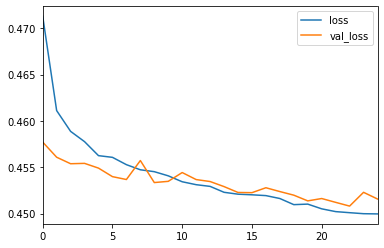

In [92]:
loss[['loss', 'val_loss']].plot()

In [88]:
predictions = model.predict_classes(X_test)

In [89]:
from sklearn.metrics import classification_report,confusion_matrix

In [90]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.57      0.04      0.07     15532
           1       0.81      0.99      0.89     63161

    accuracy                           0.80     78693
   macro avg       0.69      0.51      0.48     78693
weighted avg       0.76      0.80      0.73     78693



In [91]:
print(confusion_matrix(y_test, predictions))

[[  560 14972]
 [  428 62733]]


In [93]:
import random
random.seed(101)
random_ind = random.randint(0,len(df))

new_customer = df.drop('loan_repaid',axis=1).iloc[random_ind]
new_customer

loan_amnt      16000.00
term              60.00
int_rate          12.12
installment      356.89
annual_inc     40000.00
                 ...   
OWN                0.00
RENT               1.00
OTHER              0.00
OWN                0.00
RENT               1.00
Name: 306669, Length: 71, dtype: float64

In [94]:
df.iloc[random_ind]['loan_repaid']

1.0